In [238]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches



In [53]:
df = pd.read_csv("DATA.CSV")
df["Model"] = df["Model"] + " " + df.d

df = df.drop(["d"],axis=1)
df = df.set_index(["Model"])
df

                  Model  d  MNIST09  MNIST38  SeVe  SeVi  ViVe
0                  QSVM        0.91     0.84  1.00  1.00  0.95
1              QNN (v1)        0.89     0.64  0.95  1.00  0.95
2              QNN (v2)        0.89     0.68  1.00  1.00  0.75
3        (padded)  qSLP  1     0.89     0.81  1.00  0.90  0.70
4        (padded)  qSLP  2     0.81     0.65  1.00  0.60  0.50
5         (padded) qSLP  3     0.81     0.65  1.00  0.60  0.50
6  (Single-qubit)  qSLP  1     0.82     0.78  1.00  1.00  0.50
7  (Single-qubit)  qSLP  2     0.82     0.70  1.00  1.00  0.55
8  (Single-qubit)  qSLP  3     0.84     0.78  1.00  0.95  0.45


,MNIST09,MNIST38,SeVe,SeVi,ViVe
Model,,,,,
QSVM,0.91,0.84,1.00,1.00,0.95
QNN (v1),0.89,0.64,0.95,1.00,0.95
QNN (v2),0.89,0.68,1.00,1.00,0.75
(padded) qSLP 1,0.89,0.81,1.00,0.90,0.70
(padded) qSLP 2,0.81,0.65,1.00,0.60,0.50
(padded) qSLP 3,0.81,0.65,1.00,0.60,0.50
(Single-qubit) qSLP 1,0.82,0.78,1.00,1.00,0.50
(Single-qubit) qSLP 2,0.82,0.70,1.00,1.00,0.55
(Single-qubit) qSLP 3,0.84,0.78,1.00,0.95,0.45


Text(0.5, 42.0, 'Model')

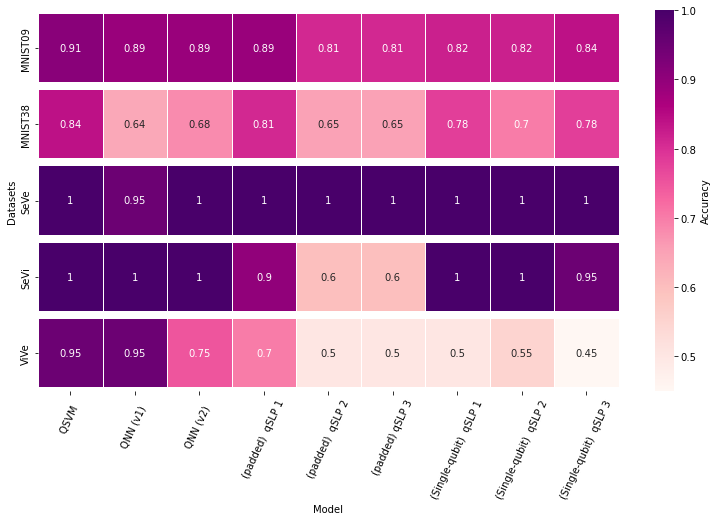

In [299]:
fig = plt.figure(figsize=(13,7))
ax = fig.subplots()
sns.heatmap(df.transpose(),annot=True,  cmap="RdPu",linewidths=1)
for i in range(5+1):
    ax.axhline(i, color='white', lw=8)
ax.set_xticklabels(df.index,rotation = 65)
ax.collections[0].colorbar.set_label("Accuracy")
ax.set_ylabel("Datasets")
ax.set_xlabel("Model")



D:\conda\envs\tesi3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


[(0, 'QSVM  '), (1, 'QNN (v1)  '), (2, 'QNN (v2)  '), (3, '(padded)  qSLP 1'), (4, '(padded)  qSLP 2'), (5, '(padded) qSLP 3'), (6, '(Single-qubit)  qSLP 1'), (7, '(Single-qubit)  qSLP 2'), (8, '(Single-qubit)  qSLP 3')]


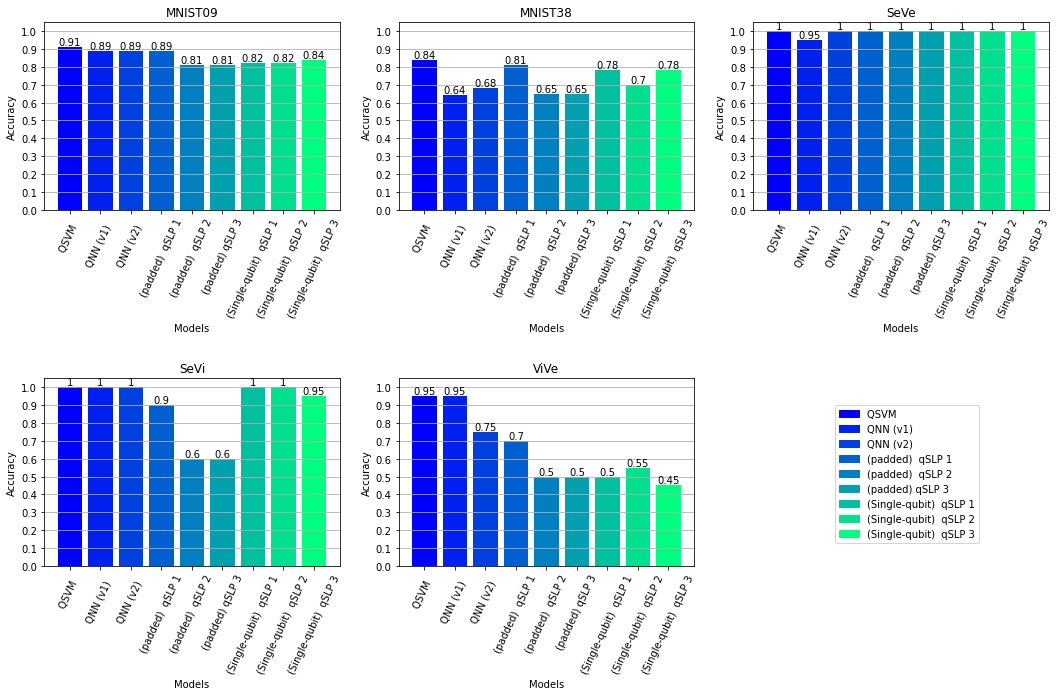

In [300]:
fig = plt.figure(figsize=(18,10))
ax = fig.subplots(2,3)
my_cmap = plt.get_cmap("winter")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

for column,sub in zip(df.columns, ax.flatten()):
    b = sub.bar(df.index, df[column], color = my_cmap(rescale(range(len(df.index)))));
    sub.set_xticklabels(df.index,rotation = 65) # Rotates X-Axis Ticks by 45-degrees
    sub.set_yticks(np.arange(0, 1.05, step=0.1))
    sub.bar_label(b)
    sub.set_title(column)
    sub.grid(axis="y")
    sub.set_ylim([0,1.05])
    sub.set_ylabel("Accuracy")
    sub.set_xlabel("Models")
fig.subplots_adjust(hspace=.9);
print([(c,i) for c,i  in zip(range(len(df.index)), df.index)])
patches = [mpatches.Patch(color=c, label = i ) for c, i  in zip(my_cmap(rescale( range(len(df.index)))), df.index)]
red_patch = mpatches.Patch(color='red', label='The red data')

fig.delaxes(ax[1,2]) #The indexing is zero-based here
fig.legend( handles = patches, ncol=1, loc = "lower right", bbox_to_anchor =(.35, 0.15, 0.5, 0.5) )

plt.show();


([<matplotlib.axis.YTick at 0x20ee6734f88>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

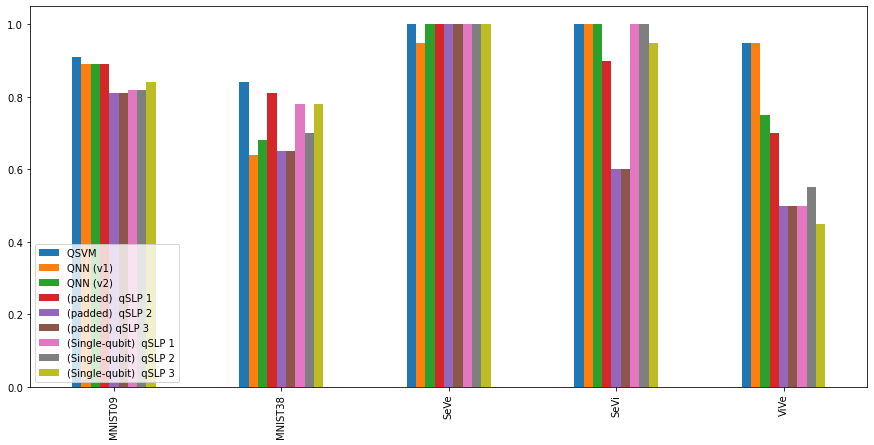

In [132]:
df.transpose().plot(kind="bar",figsize=(15,7))
plt.legend(loc='lower left')
plt.yticks(np.arange(0, 1.05, step=0.2))
